In [4]:
import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
from codes.experimentclasses.RigidEthanolAngles import RigidEthanolAngles
from codes.otherfunctions.multirun import get_coeffs_reps
from codes.otherfunctions.multirun import get_grads_reps_pca2
from codes.otherfunctions.multiplot import plot_betas, plot_betas2reorder
from codes.geometer.RiemannianManifold import RiemannianManifold
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from collections import OrderedDict
import math
from matplotlib.lines import Line2D
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10

def width(p,w):
    if p > 1.:
        output = 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)
    else:
        output = w
    return(output)

%matplotlib inline


#set parameters
n = 10000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
itermax = 1000 #maximum iterations per lasso run
tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
n_components = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time =.05 #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])

#run experiment
atoms4 = np.asarray([[6,1,0,4],[4,0,2,8],[7,6,5,1],[3,0,2,4]],dtype = int)
max_search = 30
dim = 2
lambda_max = 100000.
q = 3

/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients


In [173]:
def plot_reg_path(coeffs, filename):
    #coeffs = np.expand_dims(coeffs, axis = 2)
    p = coeffs.shape[3]
    #gnames = np.asarray([r"$\displaystyle g_1$",
    #r"$\displaystyle g_2$",
    #r"$\displaystyle g_3$",
    #r"$\displaystyle g_4$"])
    #def plot_betas(experiments, xaxis, title,filename, gnames,nsel):
    # help(megaman)
    filename = filename+ 'symlog'
    xlabel = r"$\displaystyle \lambda$"
    ylabel = r"$\displaystyle \|\hat \beta_{j}\|_2$"
    rcParams['axes.titlesize'] = 30
    plt.rc('text', usetex=True)

    norm = matplotlib.colors.Normalize(vmin=0, vmax=p)
    cmap = plt.cm.rainbow
    #nreps = len(experiments.keys())
    nreps = 1
    maxes = np.zeros(q)
    for k in range(q):
        for l in range(nreps):
            # or j in range(p):
            #coeffs = np.expand_dims(coeffs, axis = 2)
            maxes[k] = np.linalg.norm(coeffs[:, k, :, :], axis=1).max()
    normax = maxes.max()
    if q > 1:
        fig, axes = plt.subplots(1, q + 1, figsize=((15 * q), 15))
        for k in range(q):
            for j in range(p):

                toplot = np.zeros((nreps, len(xaxis)))
                for l in range(nreps):
                    #coeffs = np.expand_dims(coeffs, axis = 2)
                    toplot[l, :] = np.linalg.norm(coeffs[:, k, :, j], axis=1)
                    # print('rep = ' ,l ,',' , 'p =',j , coeffs[:,k,:,j].max())
                #print(toplot)
                w = .15
                widths = np.asarray([width(xaxis[i], w) for i in range(len(xaxis))])
                # axes[k].boxplot(toplot, positions = xaxis, showfliers=False, patch_artist = True, vert = True ,widths=widths)
                axes[k+1].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
                axes[k+1].plot(xaxis, toplot.mean(axis=0), 'go--', linewidth=5, markersize=0, alpha=1.,
                             color=cmap(norm(j)), label=gnames[j])
#                 # axes[k].plot(xaxis, , axis = 1), 'go--', linewidth=5, markersize=0, alpha = 1, color = cmap(norm(j)), label = gnames[j])
        for j in range(p):
            toplot = np.zeros((nreps, len(xaxis)))
            for l in range(nreps):
                #coeffs = np.expand_dims(coeffs, axis = 2)
                toplot[l, :] = np.linalg.norm(np.linalg.norm(coeffs[:, :, :, j], axis=2), axis=1)
            axes[0].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
            axes[0].plot(xaxis, toplot.mean(axis=0), 'go--', linewidth=5, markersize=0, alpha=1.,
                         color=cmap(norm(j)), label=gnames[j])
        
        kkk = xaxis.copy()
        kkk.sort()
        

        for k in range(1 + q):
            axes[k].tick_params(labelsize=50)
#            print(kkk[[1,-2]])
            #axes[k].set_xlim(kkk[[1,-2]])
            
            axes[k].set_xscale('symlog')
            axes[k].set_yscale('symlog')
            #axes[k].set_ylim(bottom=0, top=5 * normax)
            axes[k].set_ylim(bottom=0, top=normax)
            #axes[k].set_ylim(bottom=0, top= 2.5*normax)
            if(k ==0):
                tixx = np.hstack([np.asarray([0]),10**np.linspace(math.floor(np.log10(normax)) , math.floor(np.log10(normax)) + 1 ,2)])
                #tixx = 10**np.linspace(math.floor(np.log10(normax)) - 2, math.floor(np.log10(normax)) + 1 ,4)
                #axes[k].set_yticks(tixx)
            if k!=0:
                #axes[k].set_yticks(tixx)
                axes[k].set_yticklabels([])
            if k!= q:
                axes[k+1].set_title(r"$\displaystyle \phi_{{{}}}$".format(k+1),fontdict  = {'fontsize':50})
            if k ==0:
                axes[k].set_title("Combined",fontdict  = {'fontsize':50})
        for k in range(1+q):
            axes[k].grid(True, which="both", alpha = True)

        handles, labels = axes[0].get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=50)
    fig.text(0.05, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=60)
    plt.suptitle(title, fontsize=55)
    fig.subplots_adjust(right=0.75)
    leg_ax = fig.add_axes([.8, 0.15, 0.05, 0.7])
    leg_ax.axis('off')
    # leg = leg_ax.legend(by_label.values(), by_label.keys(), prop={'size': 55})
    leg = leg_ax.legend(by_label.values(), gnames, prop={'size': 200/p})
    #leg.set_title('Torsion', prop={'size': Function})
    for l in leg.get_lines():
        l.set_alpha(1)
    #fig.savefig(filename + 'beta_paths_log_n' + str(n) + 'nsel' + str(nsel) + 'nrepss' + str(
    #    nreps) + 'rigidcombotoohighiter')
    fig.savefig(filename + 'beta_paths_n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(
        nreps))

In [ ]:

def cosine_similarity(a,b):
    output = np.dot(a,b) / (np.linalg.norm(a) * np.linalg.norm(b) )
    return(output)

#def get_cosines(self, dg):
def get_cosines(dg):
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]

    coses = np.zeros((n,p,p))
    for i in range(n):
        for j in range(p):
            for k in range(p):
                coses[i,j,k] = cosine_similarity(dg[i,j,:],dg[i,k,:])#sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]
    cos_summary = np.abs(coses).sum(axis = 0) / n
    return(cos_summary)

In [7]:
experiment = RigidEthanolAngles(dim, cor,var,ii,jj, cores, False, atoms4)
experiment.M  = experiment.generate_data(noise = False)
experiment.q = n_components
experiment.dimnoise = dimnoise


In [8]:
experiment.M.geom = experiment.M.compute_geom(diffusion_time, n_neighbors)

initializing Geometry
executing laplacian.compute_laplacian_matrix
executing Laplacian.laplacian_matrix
pre _compute_laplacian
executing GeometricLaplacian._compute_laplacian
executing _normalize_laplacian
executing _normalize_laplacian
post _compute_laplacian


In [11]:

experiment.N = experiment.M.get_embedding3(experiment.M.geom, n_components, diffusion_time, dim)


executing laplacian.compute_laplacian_matrix
executing Laplacian.laplacian_matrix
pre _compute_laplacian
executing GeometricLaplacian._compute_laplacian
executing _normalize_laplacian
executing _normalize_laplacian
post _compute_laplacian


/Users/samsonkoelle/anaconda3/envs/py35021518/lib/python3.5/site-packages/megaman/geometry/rmetric.py:95: RuntimeWarning: divide by zero encountered in reciprocal
  Einv = E**(-1)


In [13]:
experiment.g0 = experiment.get_g_full_sub(experiment.M.data,experiment.atoms4[0])
experiment.g1 = experiment.get_g_full_sub(experiment.M.data,experiment.atoms4[1])
folder = workingdirectory + '/Figures/rigidethanol/' + now + 'nopca'
os.mkdir(folder)
experiment.N.plot([0,1,2], list(range(n)),experiment.g0,.1,.1, folder + '/g1')
experiment.N.plot([0,1,2], list(range(n)),experiment.g1,.1,.1, folder + '/g2')


In [ ]:

#experiment.M.selected_points = np.random.choice(list(range(n)),nsel,replace = False)
nreps = 5
#import pickle
#with open('ethanolsavegeom1.pkl', 'wb') as output:
#    pickle.dump(experiment.N, output, pickle.HIGHEST_PROTOCOL)
print('pregrad',datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S"))


Why do we project and then use lasso?  We could look at top correlation... This is analytic.  We can compute
$\nabla f |_{\beta = 0}$ and get the best result this way.  That is,
\begin{align*}
\nabla f |_{\beta = 0} = \sum_{i = 1}^n -2 x_i (y_i - x_i \beta_i) + \lambda \sum_{j = 1}^p \nabla \sum \beta_{j1, ...}^2  |_{beta = 0} =  \sum_{i = 1}^n -2 x_i (y_i)
\end{align*}

In [44]:
from codes.geometer.ShapeSpace import ShapeSpace
from codes.geometer.TangentBundle import TangentBundle

def get_grads(self, M, N , selected_points):
    tangent_bases = self.M.get_wlpca_tangent_sel(M, selected_points)
    subM = RiemannianManifold(M.data[selected_points], dim)
    subM.tb = TangentBundle(subM, tangent_bases)
    N.tangent_bundle = TangentBundle(N, N.geom.rmetric.embedding_eigenvectors)
    df_M = self.get_dF_js_idM(M, N, subM.tb, N.tangent_bundle,selected_points,dimnoise)        #experiments[i].df_M = experiments[i].df_M / np.linalg.norm(experiments[i].df_M, axis=1).sum(axis=0)
    df_M2 = df_M / np.linalg.norm(df_M) ** 2
    dg_x = self.get_dx_g_full(M.data[selected_points])
    W = ShapeSpace(self.positions, M.data)
    dw = W.get_dw(cores, self.atoms3, self.natoms, selected_points)
    dg_w = self.project(np.swapaxes(dw, 1, 2),self.project(dw, dg_x))
    dgw_norm = self.normalize(dg_w)
    dg_M = self.project(subM.tb.tangent_bases, dgw_norm)
    return(df_M2, dg_M)

In [ ]:
def get_dg_M(self, M,selected_points):
    tangent_bases = self.M.get_wlpca_tangent_sel(M, selected_points)
    subM = RiemannianManifold(M.data[selected_points], dim)
    subM.tb = TangentBundle(subM, tangent_bases)
    dg_x = self.get_dx_g_full(M.data[selected_points])
    W = ShapeSpace(self.positions, M.data)
    dw = W.get_dw(cores, self.atoms3, self.natoms, selected_points)
    dg_w = self.project(np.swapaxes(dw, 1, 2),self.project(dw, dg_x))
    dgw_norm = self.normalize(dg_w)
    dg_M = self.project(subM.tb.tangent_bases, dgw_norm)
    return(dg_M)    

preplot March_03_2020_19_33_07


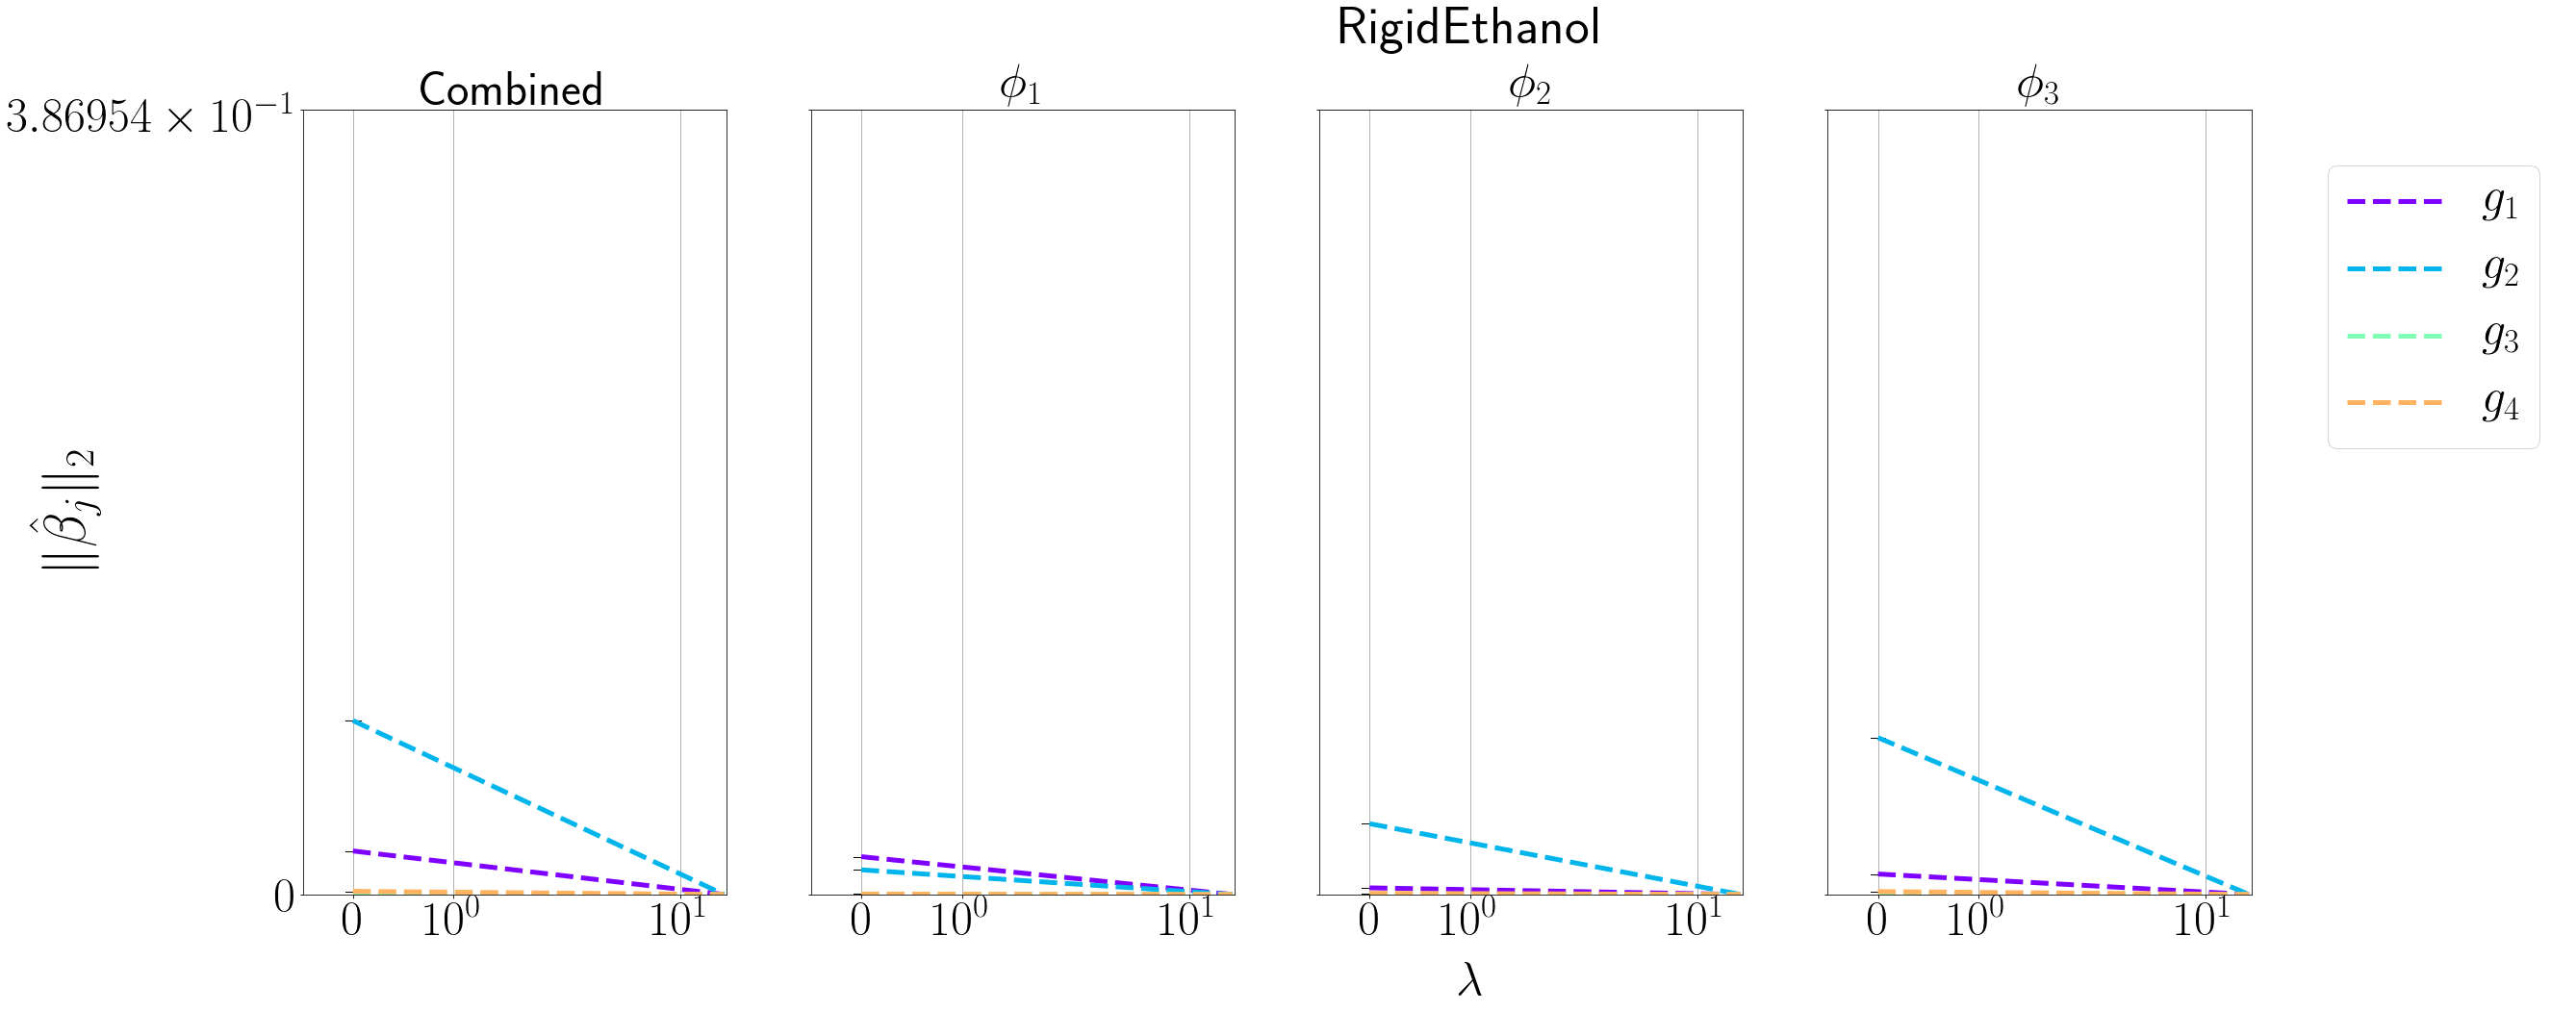

In [158]:
df_M, dg_M = get_grads(experiment, experiment.M, experiment.N, selected_points = np.asarray([0,1,2]))
xtrain, groups = self.construct_X_js(dg_M)
ytrain = self.construct_Y_js(df_M,dimnoise)


lambdas = np.asarray([0,.1])
coeffs = {}
combined_norms = {}



coeffs = self.get_betas_spam2(xtrain, ytrain,groups, lambdas, len(selected_points), q, itermax, tol)
xaxis = np.asarray(lambdas, dtype = np.float64) * np.sqrt(n * n_components)
title ='RigidEthanol'
gnames = np.asarray([r"$\displaystyle g_1$",
	r"$\displaystyle g_2$",
	r"$\displaystyle g_3$",
	r"$\displaystyle g_4$"])
#gnames = np.asarray(list(range(experiment.p)), dtype = str)
#folder = workingdirectory + '/Figures/rigidethanol/' + now
#os.mkdir(folder)
filename = folder + '/betas'
print('preplot',datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S"))
xtitle = 'asdf'
plot_reg_path(coeffs, '/Users/samsonkoelle/lebouef')

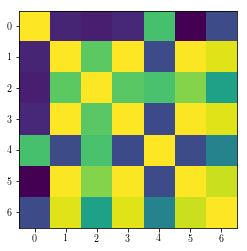

In [153]:
full = np.concatenate([dg_M, np.swapaxes(df_M,1,2)],1)
asdf = get_cosines(full)
plt.imshow(asdf)

preplot March_03_2020_19_36_08


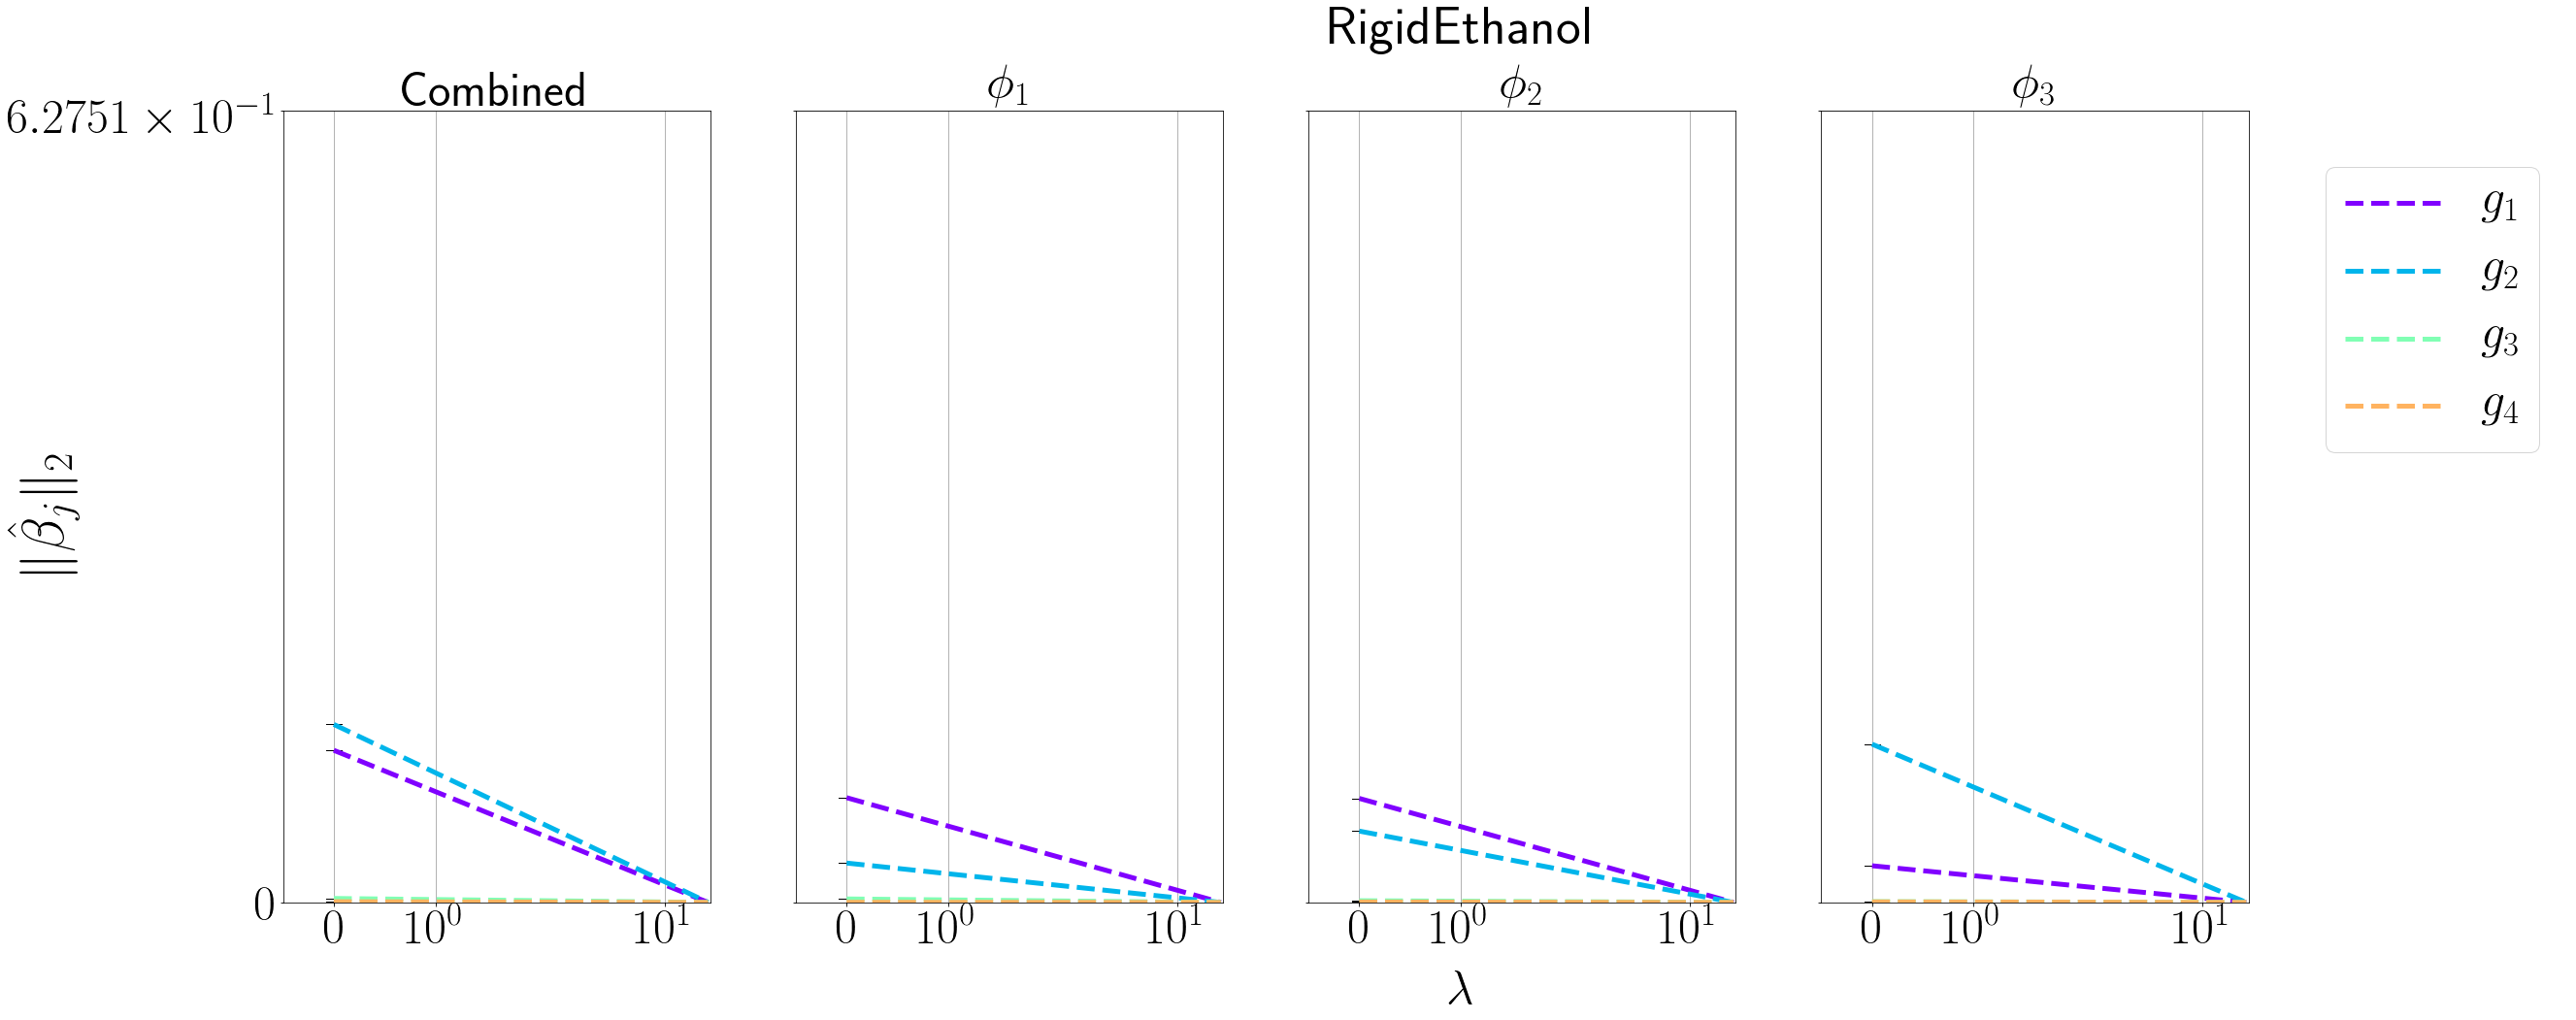

In [159]:
nsel = 100
selected_points = np.random.choice(list(range(experiment.n)), nsel, replace=False)

df_M, dg_M = get_grads(experiment, experiment.M, experiment.N, selected_points = selected_points)
xtrain, groups = self.construct_X_js(dg_M)
ytrain = self.construct_Y_js(df_M,dimnoise)


lambdas = np.asarray([0,.1])
coeffs = {}
combined_norms = {}



coeffs = self.get_betas_spam2(xtrain, ytrain,groups, lambdas, len(selected_points), q, itermax, tol)
xaxis = np.asarray(lambdas, dtype = np.float64) * np.sqrt(n * n_components)
title ='RigidEthanol'
gnames = np.asarray([r"$\displaystyle g_1$",
	r"$\displaystyle g_2$",
	r"$\displaystyle g_3$",
	r"$\displaystyle g_4$"])
#gnames = np.asarray(list(range(experiment.p)), dtype = str)
#folder = workingdirectory + '/Figures/rigidethanol/' + now
#os.mkdir(folder)
filename = folder + '/betas'
print('preplot',datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S"))
xtitle = 'asdf'
plot_reg_path(coeffs, '/Users/samsonkoelle/lebouef2')

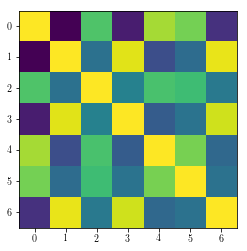

In [163]:
full = np.concatenate([dg_M, np.swapaxes(df_M,1,2)],1)
asdf = get_cosines(full)
plt.imshow(asdf)

In [162]:
dg_M.shape


(100, 4, 2)

In [160]:
df_M.shape

(100, 2, 3)

In [165]:
from codes.otherfunctions.get_dictionaries import get_atoms_4

In [168]:
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])
atoms4,p = get_atoms_4(9,ii,jj)
experiment.p = p
experiment.atoms4 = atoms4

preplot March_03_2020_21_41_06


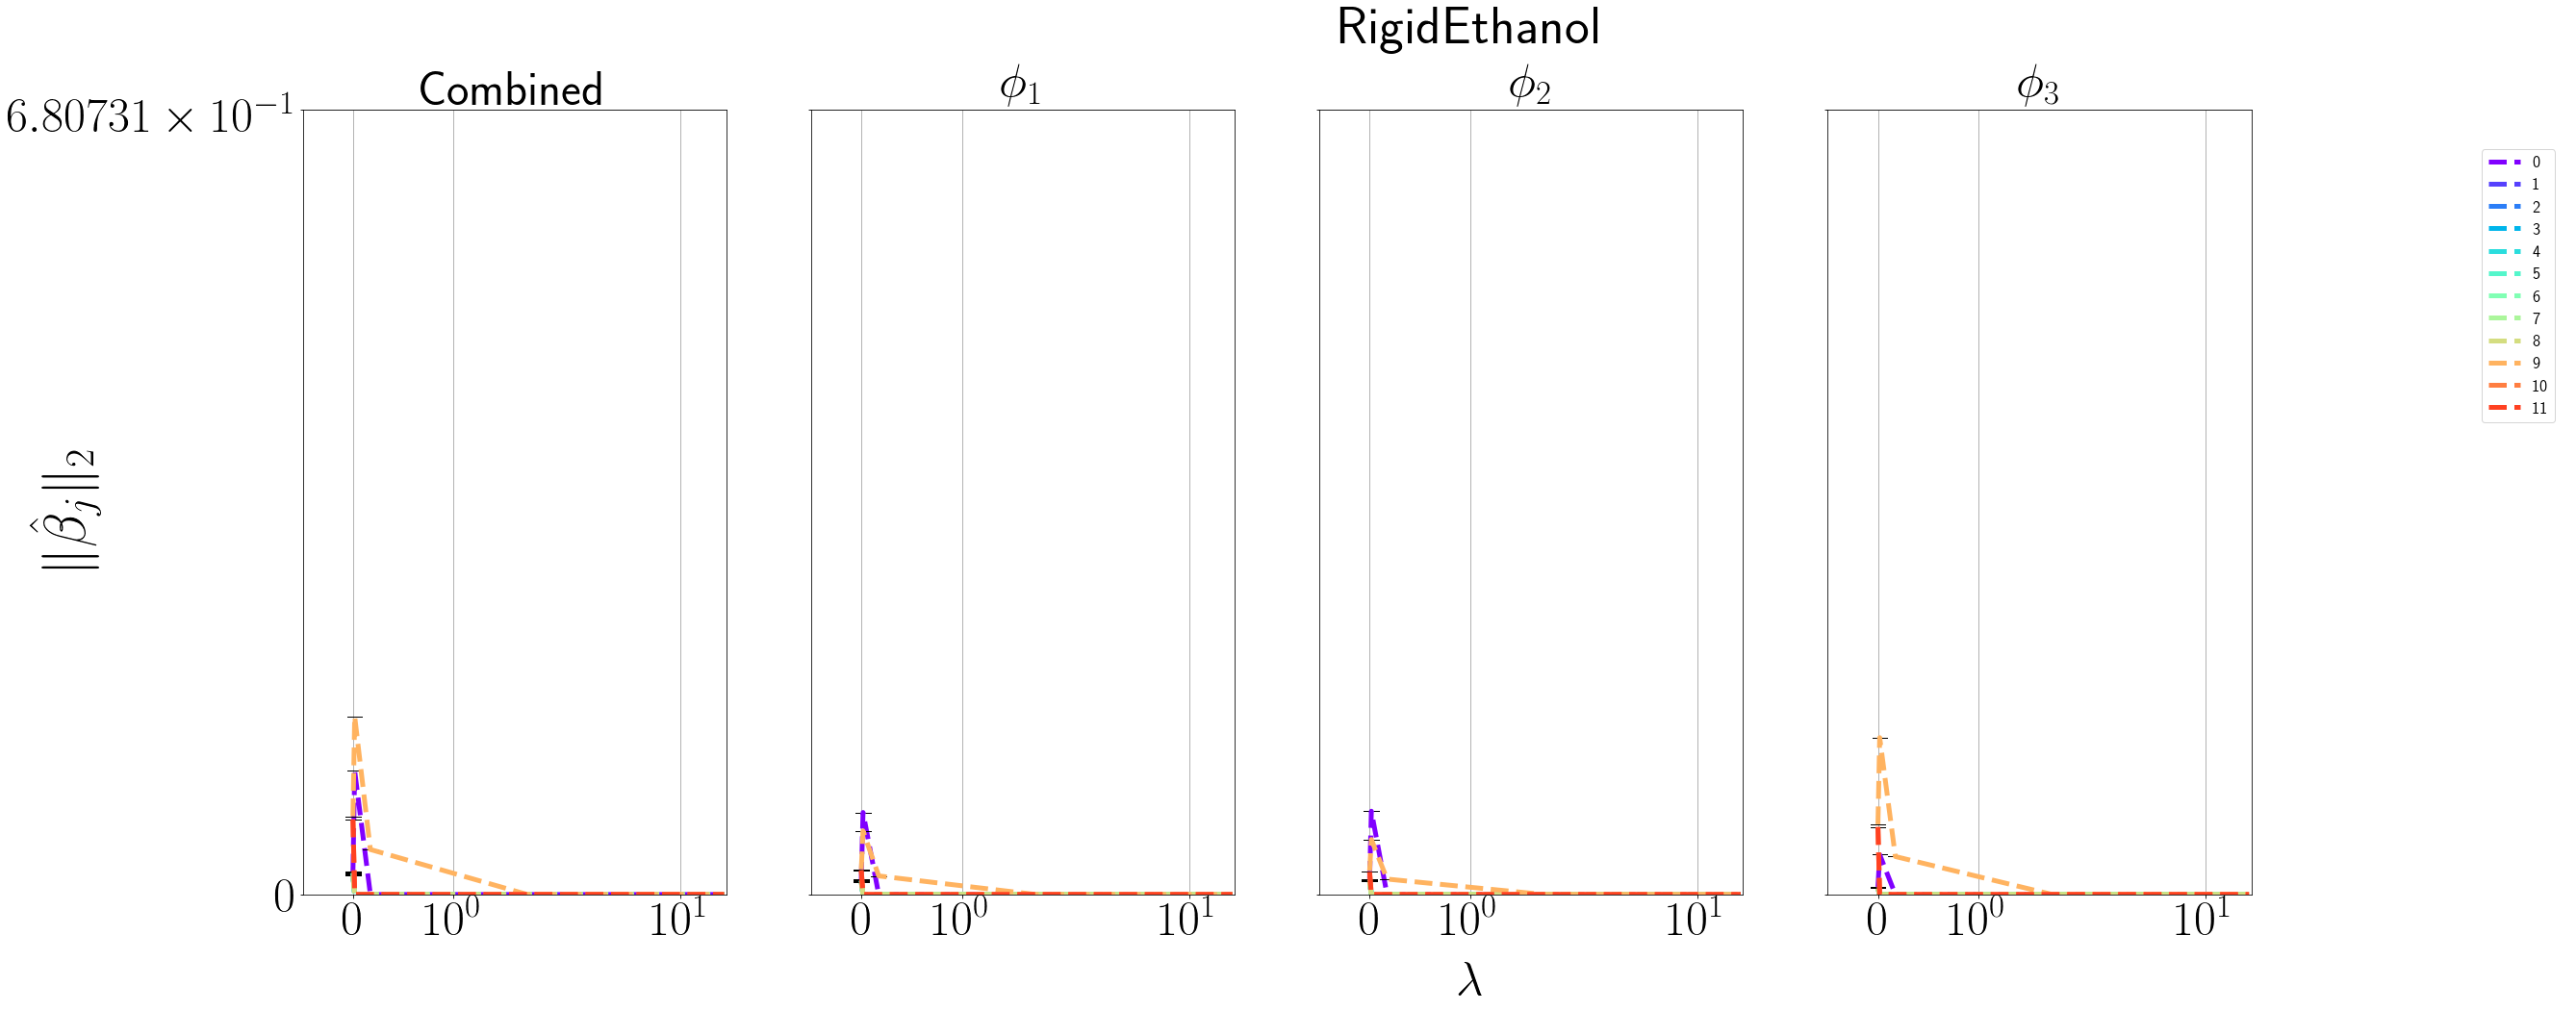

In [172]:
nsel = 100
selected_points = np.random.choice(list(range(experiment.n)), nsel, replace=False)

df_M, dg_M = get_grads(experiment, experiment.M, experiment.N, selected_points = selected_points)
xtrain, groups = self.construct_X_js(dg_M)
ytrain = self.construct_Y_js(df_M,dimnoise)


lambdas = np.asarray([0,.0001,.001,.01,.1])
coeffs = {}
combined_norms = {}



coeffs = self.get_betas_spam2(xtrain, ytrain,groups, lambdas, len(selected_points), q, itermax, tol)
xaxis = np.asarray(lambdas, dtype = np.float64) * np.sqrt(n * n_components)
title ='RigidEthanol'
gnames = np.asarray(list(range(experiment.p)), dtype = str)
#gnames = np.asarray(list(range(experiment.p)), dtype = str)
#folder = workingdirectory + '/Figures/rigidethanol/' + now
#os.mkdir(folder)
filename = folder + '/betas'
print('preplot',datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S"))
xtitle = 'asdf'
plot_reg_path(coeffs, '/Users/samsonkoelle/lebouef2')

In [ ]:
#def get_cosines():
    

In [ ]:
#def cosine_selector():

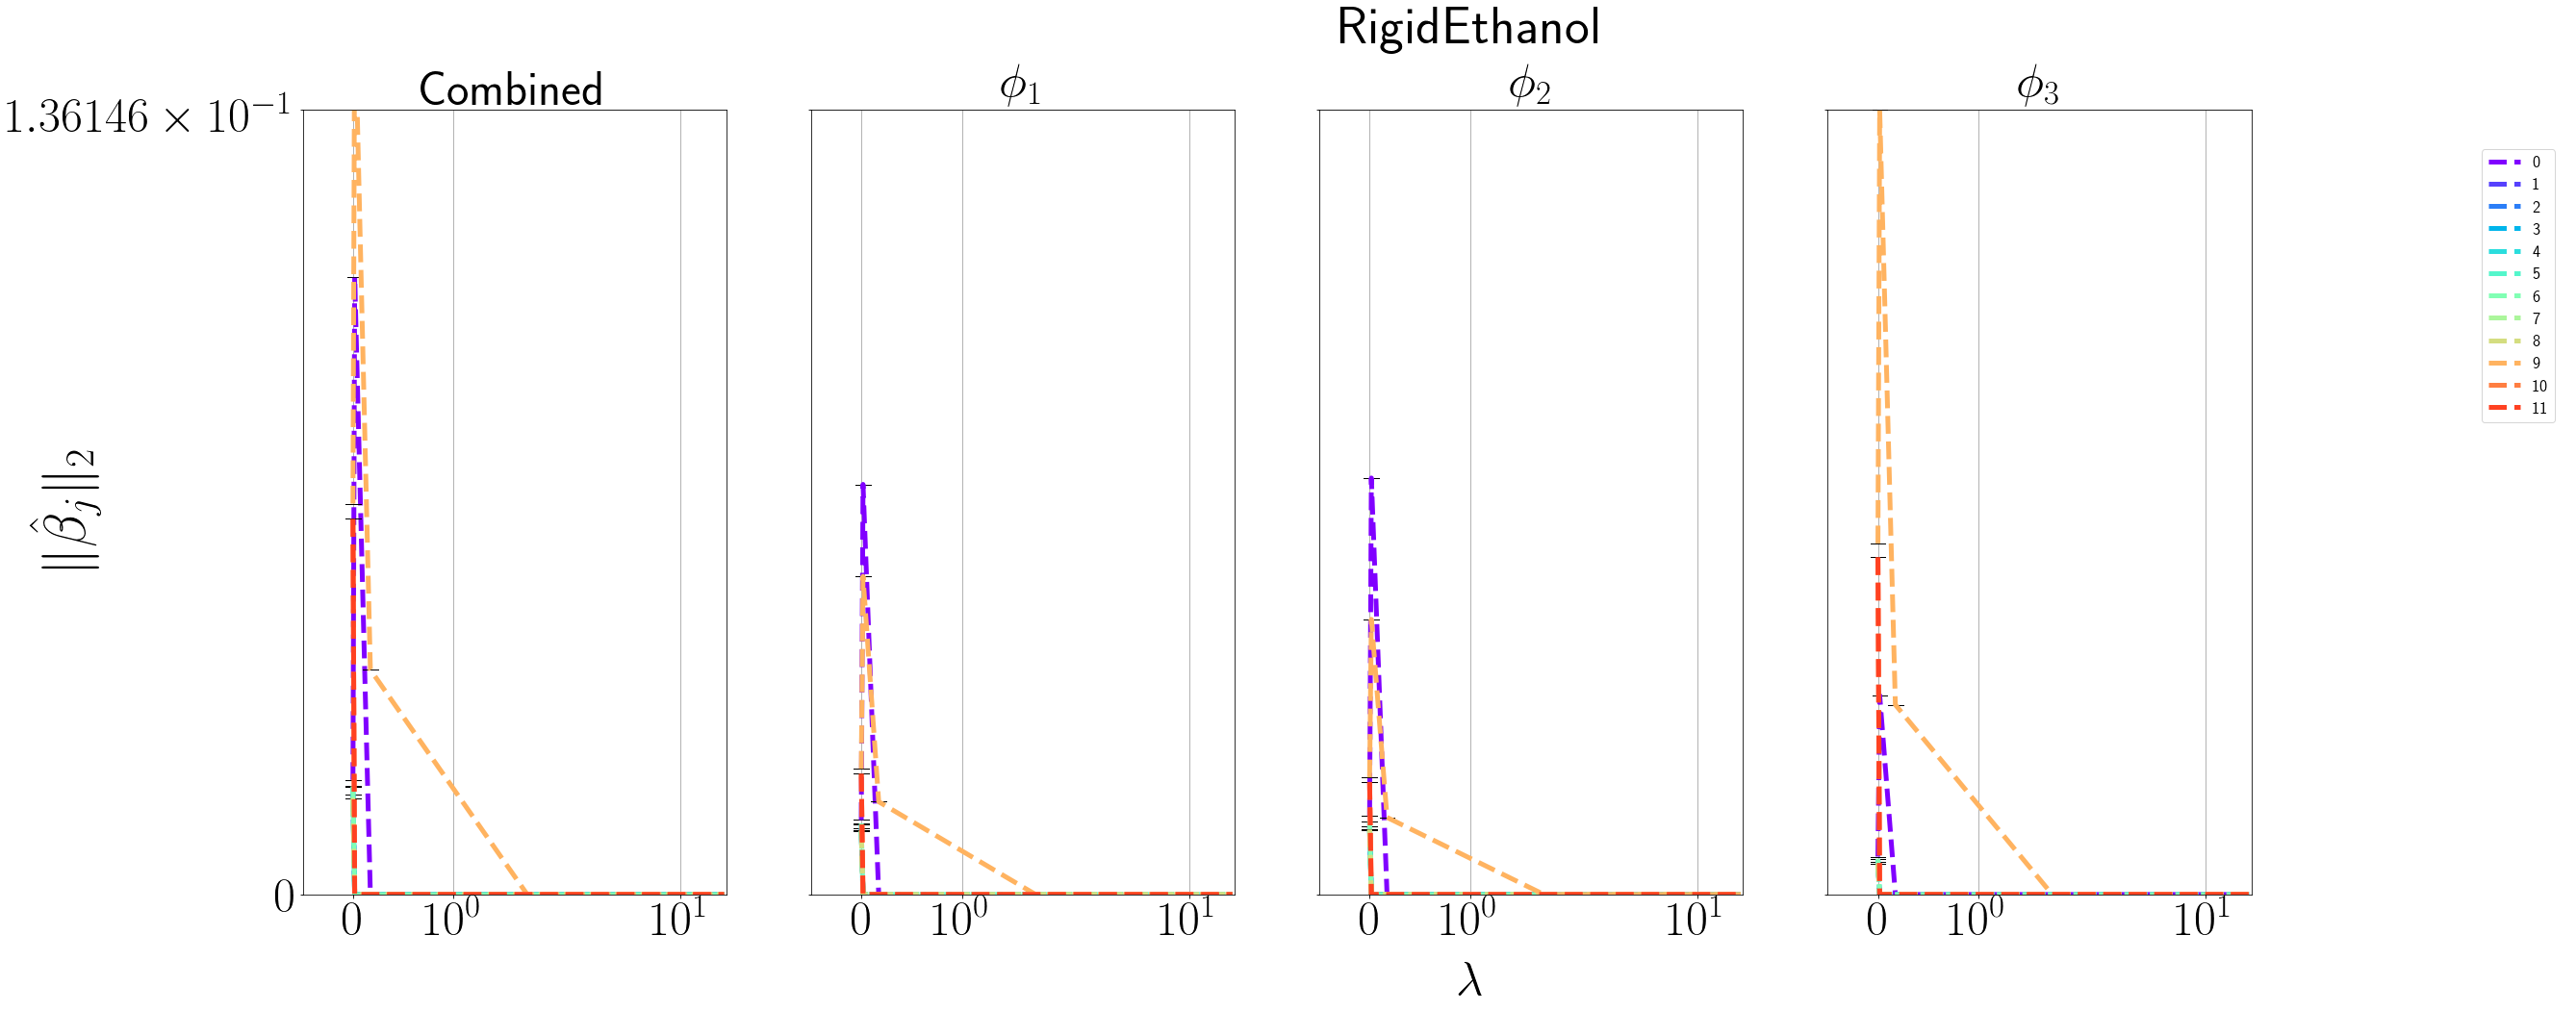

In [174]:
plot_reg_path(coeffs, '/Users/samsonkoelle/lebouef2')

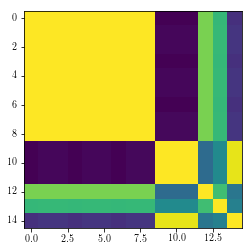

In [170]:
full = np.concatenate([dg_M, np.swapaxes(df_M,1,2)],1)
asdf = get_cosines(full)
plt.imshow(asdf)

Is the group lasso penalty of the least squares solution the right penalty? Recall that the group lasso penalty is 
\begin{align*}
\|\beta\|_{1,2} = \\sum_{j = 1}^p \|\beta_j\|_2
\end{align*}
With proper normalization, in the tangent space case, we have that 
\begin{align*}
\|\beta^{OLS}\|_{1,2} = d\sqrt{n}. 
\end{align*}
This type of result is a certificate.  A best answer satisfies this quality, or if we have an answer with this quality, it is the best.  Why is it best?

Suppose we have $d$ non-orthogonal unit vectors $V = v_1 \dotsc v_d$. Then $\beta_{OLS} = U V^{-1} $, and $\|\beta_{OLS}\|_{1,2} = \|U V^{-1}\|_{1,2} = \|V^{-1}\|_{1,2}$ by the argument in the paper.  Thus, if $V = I_d$, $\|\beta_{OLS}\|_{1,2} = d$. Moreover, $\|\beta_{OLS, 1:n}\|_{1,2} = \sum \|\beta_{OLS, 1:n}\|_2 = \sum \sqrt{\sum} $

We can extend these properties to n points.  In this case, we are rotating with a block matrices 
\begin{align*}
\begin{bmatrix}
U_1 & 0  & 0\\
0 & \dotsc & 0 \\
0 & 0 & U_d
\end{bmatrix}
\end{align*}
which is unitary since $U_i = U_i^{-1} \implies U_{1:n} = U_{1:n}^{-1}$ and taking the norm $\|\beta_{OLS,1:n}\|_{1,2} = \|U_{1:n} V_{1:n}^{-1}\|_{1,2} = \dotsc $.  Let's show that this goes up:

Suppose $V$ is equal to the identity expect for one column.  Assume $\beta_{OLS}$ for these columns is the identity.  A big vector elsewhere would be good, bus oscillation is bad.

Minimization takes place in the general linear group quotiented by the special orthogonal group

The proof goes like this: oscillating is worse than non oscillating, and orthogonal is better than non-orthogonal.

[comment]: <> (group $\mathbb R^d \times S(d)$,   #which is additive group $\mathbb R^d$ producted with the symmetric group $S_d$.  #This is because  permutations)

[comment]: <> (This is not the same as noting that entire data is is a single data point in the space of data sets, since the matrix is block diagonal.)

It is different than the convex certificate, which is
\begin{align*}
X_i^T(I_d - X_i B_i) = \frac{\lambda}{\sqrt{nd} }
\begin{cases}{
\frac{\beta_i}{\|\beta\|_i}}  \text{ if } \beta_i \neq 0  \\
z_j \text{ otherwise}
\end{cases} \forall i
\end{align*}
where $z_j$ is an arbitrary vector in $\mathbb R^{dn}$ with $\|z_j \|_2 < 1$.

We briefly derive this condition below.  The KKT condition is 
\begin{align*}
\nabla \frac{1}{2} \sum_{i = 1}^n \|I_d - X_i B_i \|_2^2  = - 
%z_j \beta_j^\star + t_j b_j^* = 0
\end{align*}
This condition has an intuitive explanation in terms of gradients of functions cancelling each other out...

The support recovery conditions we have generated are of type ('if this dictionary satistifies certain conditions of functional independence with respect to the true support, then the true support will be recovered.')  However, these conditions do not entirely characterize what the 'true' support is.  Some lasso analyes characterize the 'true' support with respect to the non-convex problem
\begin{align}
\min \|y - x \beta\|_2^2  + \lambda \|\beta\|_0.
%\label{eq:l0}
\end{align}
$\|\beta\|_1 < t$ is the convex hull of $\|\beta\|_0 < t$, and given certain conditions, \ref{eq:l0} gives the same support as \ref{eq:l1}. However, the coefficient values will be different.

However, we can also consider \ref{eq:l1} as an approximation to
\begin{align*}
\min \|\beta\|_1s s.t. y = x \beta
\end{align*} 

To see this, understand that estimator
\begin{align*}
\min \lambda \|\beta\|_1 + \|y - x \beta\|_2^2
%\label{eq:l1}
\end{align*}
has an equivalent formulation
\begin{align*}
\min \|y - x \beta\|_2^2 s.t. \|\beta\|_1 \leq t
\end{align*}
and that the minimum is achieved on the boundary 
\begin{align*}
\min \|y - x \beta\|_2^2 s.t. \|\beta\|_1 = t.
\end{align*}
Similarly
\begin{align*}
\min \|\beta\|_1 s.t. \|y - x \beta\|_2^2 \leq t
\end{align*}
is achieved on the boundary. Thus, we can set $t = 0$ and solve
\begin{align*}
\min \|\beta\|_1.
\end{align*}
Note that this is not the answer to \ref{eq:l1} $\lambda \to \infty$, since past a critical point, $\beta = 0$.  Thus, \ref{eq:l1constrained} and \ref{eq:l2constrained} are different functions, but with a similar relationship to  \ref{eql1l2} and, importantly, \ref{eq:l1}.   

Differences are that \ref{eq:l2} is not well-defined, while \ref{eq:l1} is well-defined, and we can always find a $\lambda$ such that \ref{l1} has corresponding solution in \ref{eq:l1constrained}; that is, a solution with the same $\lambda$ vaues.

What happens when $\beta = 0$?

In \ref{eq:}, as $\lambda$ goes to infinity, we approach the regime in $\ref{1l}$ as $\lambda \to 0$ (but not $\lambda = 0$ itself).  In $\ref{1l}$, as $\lambda \to \infty$, we clearly do not attain as a limit the regime where $\lambda = 0 $ in \ref{eq:}.


As we vary $\lambda$, we move along the regularization path.  Can we compute the gradient of $\beta$, the function given by the output of the optimization problem, with respect to $\lambda$?

In [ ]:
#these optimization problems are different functions of the data that embed the parameter manifold differently

In [ ]:
#help(experiment.compute_penalty2)
from itertools import combinations
parameterizations_possible = np.asarray(list(combinations(range(experiment.p), dnoise)))
nparameterizations_possible = parameterizations_possible.shape[0]
def get_penalty(coeffs):
    pen = np.sum(np.linalg.norm(coeffs[i,j], axis = 1))
    return(pen)
brute_coeffs = np.zeros((n, nparameterizations_possible, experiment.dim, experiment.q))
orthogonality = np.zeros((n, nparameterizations_possible))
for i in range(n):
    for j in range(nparameterizations_possible):
        brute_coeffs[i,j] = np.linalg.lstsq(experiment.dg_M[i,parameterizations_possible[j],:],experiment.df_M[i])[0]
        orthogonality[i,j] = get_penalty(brute_coeffs[i,j])

In [ ]:
#def get_max_cosine